## BPNet tf-Modisco report

In [1]:
modisco_dir = "/users/avsec/workspace/basepair/data/processed/chipnexus/exp/models/oct-sox-nanog-klf/models/n_dil_layers=9/modisco/valid/new-hparams"

In [2]:
# Parameters
modisco_dir = "Sox2"


In [3]:
from basepair.modisco.results import ModiscoResult
from basepair.config import get_data_dir
from basepair.utils import read_json
from basepair.plot.vdom import vdom_modisco
from kipoi.readers import HDF5Reader
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from plotnine import *

Using TensorFlow backend.


In [4]:
mr = ModiscoResult(f"{modisco_dir}/modisco.h5")
mr.open()

In [5]:
# load the data
modisco_kwargs = read_json(os.path.join(modisco_dir, "kwargs.json"))
d = HDF5Reader(modisco_kwargs['imp_scores'])
d.open()

In [6]:
strand_dist_file = f"{modisco_dir}/strand_distances.h5"
if modisco_kwargs.get("ignore_strand_dist", False) and os.path.exists(strand_dist_file):
    included_samples = HDF5Reader.load(strand_dist_file)['included_samples']
else:
    included_samples = np.ones(d.f['inputs'].shape[:1], dtype=bool)
    
if modisco_kwargs.get("filter_npy", None) is not None:
    included_samples = np.load(modisco_kwargs['filter_npy']) * included_samples
    
    
id_hash = pd.DataFrame({"peak_id": d.f['/metadata/interval_from_task'][:][included_samples], 
                        "example_idx": np.arange(d.f['/metadata/interval_from_task'][included_samples].shape[0])})
tasks = list(d.f["targets"]["profile"].keys())

In [7]:
# get all seqlet instances
dfp = mr.seqlet_df_instances().rename(columns=dict(seqname="example_idx"))
dfp = pd.merge(dfp, id_hash, on="example_idx")

TF-MoDISco is using the TensorFlow backend.


In [8]:
# row = example_idx
total_counts = pd.DataFrame({task: d.f[f"/targets/profile/{task}"][:][included_samples].sum(axis=-1).sum(axis=-1)
          for task in tasks
         })

In [9]:
len(mr.patterns())

23

In [10]:
# total number of seqlets
len(dfp)

22528

In [11]:
# Number of metaclusters
len(mr.metaclusters())

2

### Number of seqlets per pattern

In [12]:
mc_stat = mr.metacluster_stats()

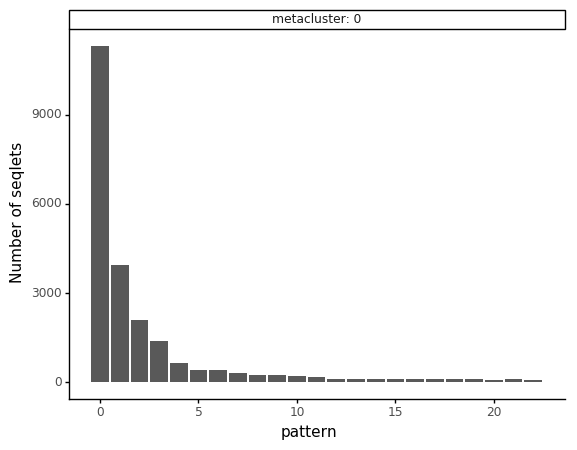

<ggplot: (8726280725182)>

In [13]:
ggplot(aes(x="pattern", y='n'), mc_stat) + geom_bar(stat='identity') + \
    facet_wrap("~metacluster", ncol=4, labeller='label_both') + \
    ylab("Number of seqlets") + theme_classic()

### Zoom-into the 500 seqlet range

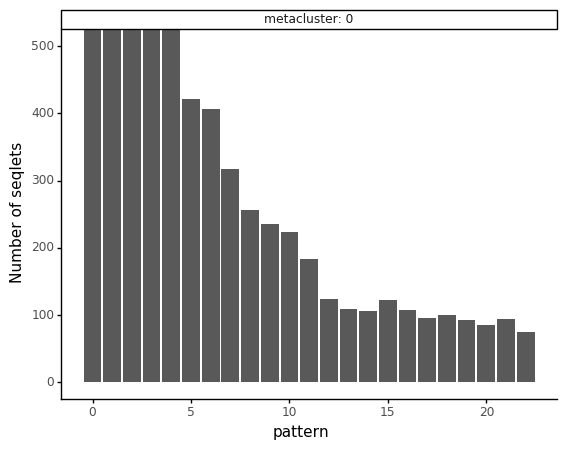

<ggplot: (-9223363310571835546)>

In [14]:
ggplot(aes(x="pattern", y='n'), mc_stat) + geom_bar(stat='identity') + \
    facet_wrap("~metacluster", ncol=4, labeller='label_both') + \
    ylab("Number of seqlets") + theme_classic() + coord_cartesian(ylim=[0, 500])

## Important tasks per metacluster

/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/pandas/plotting/_core.py:998: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(left, right)
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/pandas/plotting/_core.py:998: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(left, right)


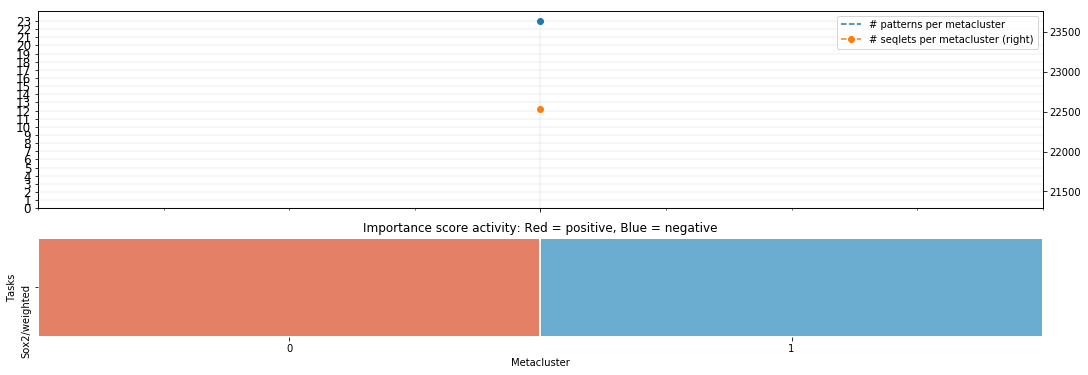

In [15]:
mcs_grouped = mc_stat.groupby("metacluster").n.agg(["count", "sum"]).reset_index()
fig, ax = plt.subplots(2, 1, sharex=False, figsize=(18,6), 
                       gridspec_kw={'height_ratios': [2,1]})
mcs_grouped.plot("metacluster", "count", 
                 label="# patterns per metacluster", style="o--", 
                 ax=ax[0], 
                 yticks=range(mcs_grouped['count'].max()+1),
                 xticks=range(38),
                 fontsize='large',
                 xlim=(-.5, len(mr.metaclusters()) - .5 ))
mcs_grouped.plot("metacluster", "sum", 
                 label="# seqlets per metacluster", 
                 style="o--", ax=ax[0], secondary_y=True)
ax[0].grid(linewidth=0.2)
mr.plot_metacluster_activity(ax[1], cbar=False)
ax[1].set_title("Importance score activity: Red = positive, Blue = negative");

In [16]:
vdom_modisco(mr, "plots", total_counts, dfp, is_open=True, trim_frac=0.08, letter_width=0.15, height=0.5)

<div><details id="metacluster_0" open><summary><b>metacluster_0</b>, # patterns: 23, # seqlets: 22528, important for: <b>Sox2</b></summary><ul><li><details id="metacluster_0/pattern_0"><summary>pattern_0: # seqlets: 11301<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAABZCAYAAAB7Ymt4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAGLlJREFUeJztnXl4VEW%2B9z/n9J6VACGBhCVhh2FRQR1UHDYdLz7iwngdmXtH751h7gWcUV/n%2Bvq6M%2BjoozOjV6/XBR1RdNwBZwZXEASRyKIQCAkQIJ0QsiedpPfTXe8flXRnIU2CCSRMfZ7nPN19qrqqTvX5nvpV/aqqNSGEQKFQnBT9bBdAoejNKIEoFDFQAlEoYqAEolDEQAlEoYiBEohCEQMlEIUiBkogCkUMlEAUihgogTSjaZ070tPPdkkVZxBNTTVpQtM6H1dV2T8M5rNdgB6nKze%2BQtEGZWKdiyhzsds4902snmhBenuVKXOx21AtiEIRAyWQWNhs8mhJWtrZKYvirHDuC6TtDd18w5/sxhei9eH3y6PlubKyM1NuRa/g3O%2BDtKWlfX6qS2%2BO29eqSPVBuo1zvwX5R6QrraYiJqoF6Uzcvl5FXblmRStUC6JQxEAJRKGIwbk/1eQcpdpTze0f347FZOGnP/gp80bOO9tFOidRAumj3P7J7azOXQ3A4ZrDSiA9hDKx%2BihHao5E3jtdzrNYknMbJZA%2BirM%2BKopyd/lZLMm5jRJIH0QIQaW7EofZQYI1gVA4hMvn6p7EDTe4nRAKdE96fRwlkD5Ina8OIQRHfnOEhnsasJvt39/MajwKG%2BbAeynwt/HwbjLk/BKCDd1T6D6KEkgfpMhVhN1iR9fkz6dr%2BvcTSP0h%2BOh8qNgE4SCEPBD2wdHV8NF54K/unoL3QZRA%2BiDNYjBpJgACocDpCyRswOarIegCEW4T5gNPMRx9/fsUt0%2BjBNKT9NDKPqfLSSAUwKRLgXgNL4W1hadXxqOvg/c4IEAzg24FexroNtBMUjTCOL20uxkhRKvjTKAE0hso79oo1OGaw/gMH3azHYB4SzwFVQWnl3feY7JjDuAYAguOwfVlcHUexGf1GnEAvLbnNfTlOvpynds%2Buu2M5KkE0gc5WH2QRGsiJs1Eg7%2BBjKQMjtYd7XpCDYelCQVgioNL3gTHYPk5IRvmbZXv3b3Dz/LS7pci7z878tkZyVN50nuStLTWrYPNJhdgNb%2B2jNcFjtUdIyMpA6/hJRwOk5mUybcnvu16%2BU58En1v7Q%2Bpl7QOd6TJFsXeOzZ3KKiOtpJFdUUIIdB6eNca1YL0JGVl7VcowvdepVjaUEpGYgZhEcakm8hIzMDldxEMBbtYvo0Q8gIaZC44eZz44WCynTzsDOIOuKnz1fH0j5/mvRvfw6SbKK4v7vF8lUD6GH7DT0OggcykTEyaCYfFQWZSJnazndKG0q4lVvedfDXHw8CLu7%2Bw3Uh%2BVT5xljh%2BPuXn3DD%2BBiy6hf0V%2B3s8XyWQPsbxhuM4zFIUDosDs25mVP9RWHQLRa6iriXmaRaUDklju72s3cn%2Byv2ERTji%2B/EaXvZXKoEo2lBUVxQRhVmXXcisflmERKhrvhDDDaLJJBOGHMHqxewt34s74MZqskbO7Szd2eP5KoH0MZwuJyERIjslO3JuaPJQPEEPRXVdaEH81dLXARDygW1gN5e0e9lRuoOBcQMRCOr99YxMGcne8r09nq8SSB%2BjyFWEJ%2BAhIzEjci41LpWwCJNfnd/5hIxG6QhsposdcSGgsREaGjpe5l7sKubDgg9Zf2g9Rvj7%2BVMKqgoYO3AsPsOHEIIxA8ZwtO5ojzsM%2B65A/kH3n82vyidMmEHxgyLnEqwJWHQLhTVd8KaHA9HNHFoKxXDD9n%2BDLQujx577I8GffQazZ0N8PKSkQP/%2B4HDAtGmwcmU0mUAowLCnhvGzD37GwncW8sq3r5zuJeMJeqj2VjNmwBjMuhmHxcHYgWPR0DjecPy00%2B0MfVcgnd3a5hyjsKYQq8mKw%2BKInPMaXoYkDunasGfLeVctfQn1B6HoLSh%2BP3rkPYZhwKJFcO218MUX4PWCYcjD74ddu2DpUihqsvK2OreSZEtictpkbGYb7%2Bx/57SvuaCqgDhLHBNTJxJnicNqsjI1fSpWk5W8yrzTTrcz9F2B9JCPobdT0lDCkMQh%2BAxf5JwRNshIyqDCXdF5k0MzQ3NUEWodplvaRb/tNlizBjweiIuD6dPh3nvhwQdh3jz5XAoEINSU1Nr8tfgNP1v/bSuLL1jMV8VfETjNNSZ5lXmERZip6VMjo1g/SP0BXsPLvop9p5VmZ%2BnVnnQhoLQUjh%2BX9318PAwdCqmpZ7tkZ4fmhVIXZV7U6rxFt5CZlMnO0p3U%2Bmrp7%2Bh/6sRMDqCpFREhWdmaBpouO%2B3mBDnTN%2Bxjr3MSq1bJViM%2BHh59FH7969bJlZfDu%2B9CZqb8vDZ/LRdmXAjAzGEzeX7n82x1bmV21uwuX3fzCNaYAWMi54b3G04gFGBX6a4up9cVeqVASkrg4Ydlhbvd8qnU/PvpOiQnw9tvw9y5Z7ukSFPFe0IuLDLHyeFSvWeqtcpTFVn7UVBVgM0szcmwCFNQVYDdZKeorqhzArEmSwGAnMEbrJfn%2Bk2GS9%2BVnfhtiwB45uOlkQZ6yBDZmrQlLQ2WLZPvj9Udo8pTxeILFmOEDGYOn4k74GZN/prTEsiO0h3omk5afNSstpls9LP347vy77qcXlfodQL5/HO47jrw%2BaKCyMyUzXpdHVRWytevvz7LAqnYCvuWQ8WXTfZ8s02vQ8pUOP9PMOiSWCl0GafLic1sw%2BlyMu2lae3Ck2xJOF1Ozht83qkTsw6QHXWQAvFXSoFoGmReI89v%2Bxkg%2BHjvFYTDYDLJfsippj%2BtP7QegGvGXoPZZAYDJg6ayNr8tTxz1TPt4r%2B7/11e2PUCJs3EfTPv47Lhl7UKP1B1gBH9RuAzfFhM0vzzGT7GDBhDbnluj87J6lV9kPJyKY7GRrBa4cYboaICjh6F/fulqVVdDW%2B8AYsXn8WC7rkPvrgSyj4Dmn4YSxJoTbZ7zQ7IfbDbsz2Vp9xv%2BDvvLNRNYE2R7zW9wxm7QsCJOjnDNy4Oxo8/ddJv738bXdMZO0B65826mTlZc6jyVHGs7liruC6fixvfu5Gc4zl8VfwVy9YvaxXuM3xUeaoYljwMq8mKy%2BfC5XNhM9sYljwMgBONJzp3zadBr2pBXnkFgk3OXYcDXn0VzG1KmJgIN910xosWpXgN5P9JLks1xcHFf4ah10uzSghoOAi5yyFjfrdn7XQ58Rt%2BdHT5ZG6BETbwh/wcrjnc%2BQQTsqCmWrYk9Qcgvb35EzCsCCEfArou6z8WPsNHTkkOs7Nm4zN82Mw2HBYH1427jud3Ps/6Q%2BtZMn1JJP6qPauIs8TRcE8D3xz/hlmrZpFbnsuktEmAHMFymB1sOraJG965ITJ7QCBYf2g98ZZ48irzGJLYMzMBepVAtm2LDkZNm9ZeHL2CvQ82icMBkx6C4TdGwzRNzmm65I0eyfpwzWH8IT9JtiT%2B44L/YHCifLK7A24e2fIIXsPbakr4KUm9BGp2yU75iU9gzNJ2USymYEQgL

Metaclusters heatmap


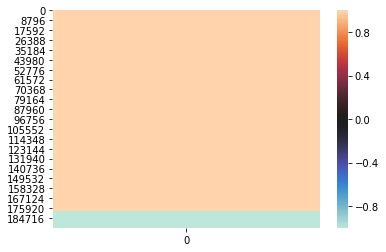

In [17]:
print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(mr.f.f['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(mr.f.f['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0);